In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [3]:
path = "watermelon_4.0.txt"
data_str = []
with open(path) as fr:
    lines = fr.readlines()
    for line in lines:
       data_str.append(line.split())
data = np.array(data_str).astype(np.float64)

In [4]:
def k_means(data_set, k, norm=2):
    m = data_set.shape[0]
    well_splited = False
    while not well_splited:
        mean_vector = data_set[np.random.choice(m, k, replace=False)]
        Flag = True
        while Flag:
            C = []
            for i in range(k + 1):
                C.append([])
            for j in range(m):
                dj = ((np.abs((data_set[j] - mean_vector)
                          ** norm).sum(axis=1)) ** (1 / norm)).argmin()
                C[dj].append(data_set[j].tolist())
            mean_prev = mean_vector.copy()
            for i in range(k):
                mean_vector[i] = np.array(C[i]).mean(axis=0).tolist()
            mean_delta = np.min(np.abs(mean_prev - mean_vector))
            if mean_delta == 0.0:
                Flag = False
        C[k] = mean_vector[:].tolist()
        # check zero split
        sub_shape = k_shape(C)
        if 1 not in sub_shape:
#             print("Well Generated")
            well_splited = True
#         else:
#             print("Generate again...")
    return C

In [5]:
def plot_res(C_set):
    # print(len(C_set))
    k = len(C_set)-1
    color_dict = ['red', 'blue', 'yellow', 
                  'green', 'gray', 'purple', 
                  'orange', 'cyan', 'pink', 
                  'black']
    for i in range(k):
        plt.scatter(
            np.array(C_set[i])[:, 0],
            np.array(C_set[i])[:, 1],
            color=color_dict[i])
        for pt in C_set[i]:
            plt.plot(
                [pt[0], C_set[-1][i][0]],
                [pt[1], C_set[-1][i][1]],
                color='black',
                linewidth=0.8)
    plt.scatter(
        np.array(C_set[-1])[:, 0],
        np.array(C_set[-1])[:, -1],
        color=color_dict[k],
        marker='x',
        s=50)

In [6]:
def k_shape(split_list):
    k_l = []
    for i in range(len(split_list)):
        k_l.append(len(split_list[i]))
    return k_l

In [7]:
def dist(a, b, norm=2):
    return ((np.abs(np.array(a) - np.array(b)) 
             ** norm).sum()) ** (1 / norm)

In [8]:
def avg(C, norm=2):
    m_C = len(C)
    avg_c = 0.0
    for k in range(m_C):
        for i in range(len(C[k])):
            for j in range(i+1, len(C[k])):
               avg_c += dist(C[k][i], C[k][j], norm)
    avg_c = 2 * avg_c / (m_C * (m_C - 1))
    return avg_c

In [9]:
def DBI(C, norm=2):
    m_C = len(C) - 1
    db_i = 0.0
    for i in range(m_C):
        i_max = 0
        for j in range(i+1, m_C):
            tt = avg(C[i]) + avg(C[j])
            dist_ij = dist(C[m_C][i], C[m_C][j])
            # print(1/dist_ij)
            tt /= dist_ij
            if tt > i_max:
                i_max = tt
        db_i += i_max
    db_i /= m_C
    # print(m_C)
    return db_i

In [10]:
def k_means_auto(data_set, norm=2):
    C = {}
    C_DBI = {}
    for i in range(3, 11):
        C[i] = k_means(data_set, i, norm)
        C_DBI[i] = DBI(C[i], norm)
    best_ks = sorted(C_DBI,key=lambda x:C_DBI[x])[0]
    plot_res(C[best_ks])
    return best_ks, C[best_ks]

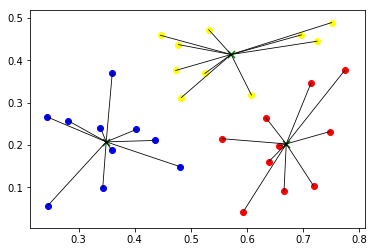

best k to split :  3


In [11]:
k, k_data = k_means_auto(data, norm=3)
print('best k to split : ', k)